# Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt, butter, periodogram

In [16]:
# exercise 1a
data = np.load('data/sample_audvis_raw.npy')
events = np.load('data/events.npy')
print(data)
print(events)

n_channels, n_time_samples = data.shape # tuple containing number of leads and time points
n_events = len(events)
print(f'nr. time samples: {n_time_samples}, nr. channels: {n_channels}, nr. events: {n_events}')

sample_freq = 600

[[ 9.64355481e-12  0.00000000e+00  0.00000000e+00 ... -1.92871096e-12
   2.89306644e-12  3.85742192e-12]
 [-4.82177740e-12 -2.89306644e-12 -9.64355481e-13 ... -9.64355481e-13
  -9.64355481e-13 -1.92871096e-12]
 [ 1.01074222e-13  6.31713890e-14  7.58056668e-14 ... -4.80102556e-13
  -6.06445334e-13 -5.93811056e-13]
 ...
 [ 1.63940432e-11  1.35009767e-11  1.44653322e-11 ...  9.64355481e-13
   2.89306644e-12  0.00000000e+00]
 [-0.00000000e+00 -1.92871096e-12  2.89306644e-12 ...  9.64355481e-13
   9.64355481e-13  4.82177740e-12]
 [ 8.84399446e-14  3.79028334e-14 -1.26342778e-14 ...  8.46496612e-13
   1.08654789e-12  1.09918217e-12]]
[  2177   2545   2971   3419   3852   4225   4650   5039   5440   5865
   6301   6719   7135   7525   7912   8289   8732   8849   9156   9628
  10050  10411  10776  11207  11660  12110  12526  12911  13330  13763
  14126  14605  15080  15460  15846  16326  16798  17138  17160  17546
  17981  18370  18849  19315  19686  20060  20440  20886  21295  21730
  22095  

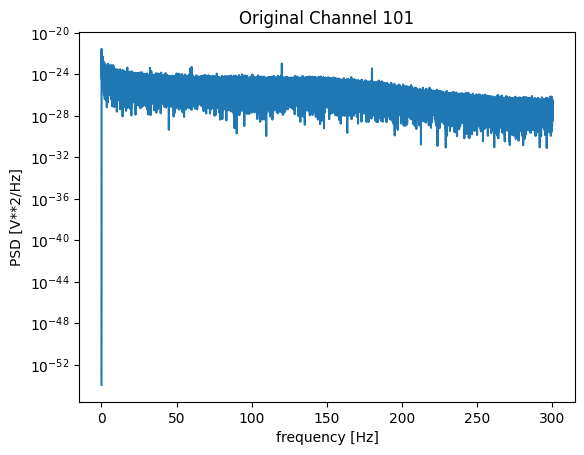

In [63]:
# exercise 2a
channel_idx = 100

f, Pxx_den = periodogram(data[channel_idx], sample_freq)
plt.semilogy(f, Pxx_den)
plt.title(f'Original Channel {channel_idx + 1}')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


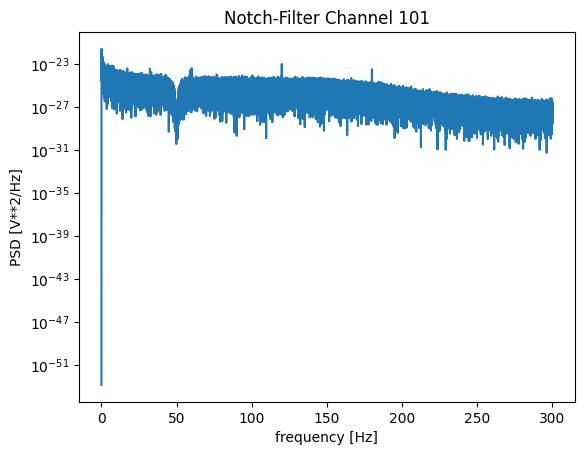

In [64]:
notch_freq = 50
quality_factor = 10

b, a = iirnotch(notch_freq, quality_factor, sample_freq)
filtered_data = filtfilt(b, a, data)

f, Pxx_den = periodogram(filtered_data[channel_idx], sample_freq)
plt.semilogy(f, Pxx_den)
plt.title(f'Notch-Filter Channel {channel_idx + 1}')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


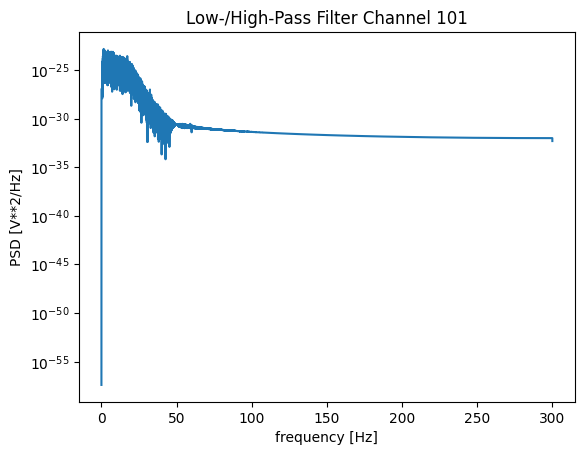

In [67]:
low = 1
high = 20

b, a = b, a = butter(4, [low, high], fs=sample_freq, btype='bandpass')
filtered_data = filtfilt(b, a, filtered_data)

f, Pxx_den = periodogram(filtered_data[channel_idx], sample_freq)
plt.semilogy(f, Pxx_den)
plt.title(f'Low-/High-Pass Filter Channel {channel_idx + 1}')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


# exercise 2b

In the original data, a significant amount of noise is present, with signals recorded across various frequency ranges. The application of both filters allows for noise suppression. Removing the 50 Hz line noise reveals a dip in the periodogram at this frequency. Following the application of the high- and low-pass filters, predominantly only frequencies within this range remain. The farther these frequencies are from 1 and 20 Hz, the less prominently they appear in the filtered data. High frequencies are now missing at all.

In [68]:
# exercise 3a
epochs = np.zeros((n_events, n_channels, 100+500+1))
for i, event_time in enumerate(events):
    start_index = int(event_time) - 100
    end_index = int(event_time) + 500 + 1
    epochs[i, :, :] = data[:, start_index:end_index]

print(epochs.shape)

(320, 305, 601)


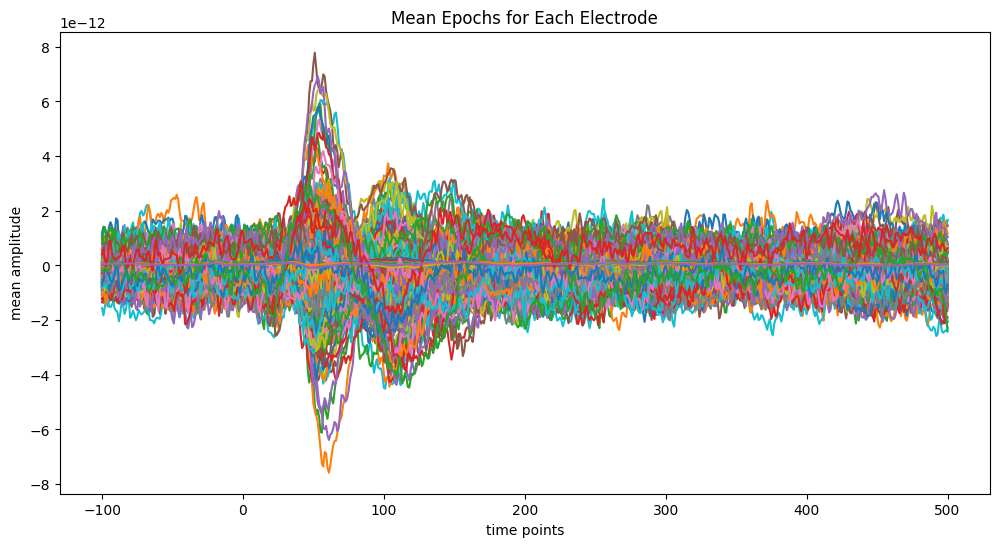

In [69]:
# exercise 3b
mean_epochs = np.mean(epochs, axis=0)

n_electrodes = mean_epochs.shape[0]

plt.figure(figsize=(12, 6))
for electrode in range(n_electrodes):
    plt.plot(np.arange(-100, 501, 1), mean_epochs[electrode, :], label=f'Electrode {electrode + 1}')

plt.title('Mean Epochs for Each Electrode')
plt.xlabel('time points')
plt.ylabel('mean amplitude')
plt.show()


In [70]:
# exercise 3c
epochs = np.zeros((n_events, n_channels, 100+500+1))
for i, event_time in enumerate(events):
    start_index = int(event_time) - 100
    end_index = int(event_time) + 500 + 1
    epochs[i, :, :] = filtered_data[:, start_index:end_index]

print(epochs.shape)


(320, 305, 601)


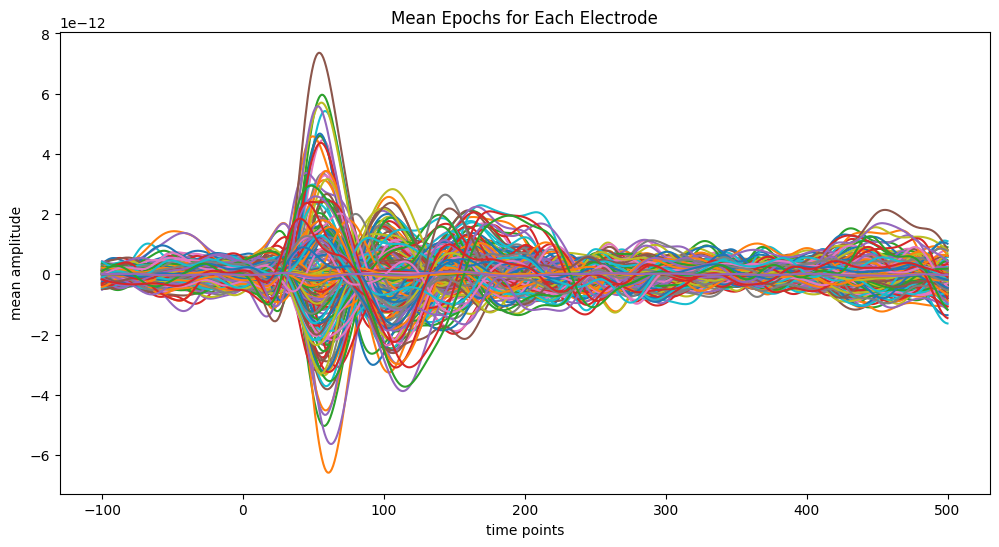

In [71]:
mean_epochs = np.mean(epochs, axis=0)

n_electrodes = mean_epochs.shape[0]

plt.figure(figsize=(12, 6))
for electrode in range(n_electrodes):
    plt.plot(np.arange(-100, 501, 1), mean_epochs[electrode, :], label=f'Electrode {electrode + 1}')

plt.title('Mean Epochs for Each Electrode')
plt.xlabel('time points')
plt.ylabel('mean amplitude')
plt.show()

# exercise 3d

In both plots, it is evident that shortly after the event, significant peaks can be observed in many electrodes. In recordings with noise, the noise is clearly noticeable, and the signals are very jittery. After noise removal, the signals are smoothed, and the peaks are more clearly discernible. Additionally, further peaks following the initial one are now visible, exhibiting a lower amplitude than the first peak. It is now also easier to discern that, during the baseline period, most electrodes did not record any anomalies.
